In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from IPython.display import Image, display
from PIL import Image
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r'C:\Users\bruna\IronHack\Project Refyld\Refyld\données')

#### Jan - Mars 2021

In [4]:
df_2021 = pd.read_csv('Post_FB_Jan_Mars_2021.csv')



#### Dec - Aout 2020

In [5]:
df_2020 = pd.read_csv('Post_FB_Dec_Aout_2020.csv')



In [6]:
df = pd.concat([df_2020, df_2021])

In [7]:
df

,Identifiant de la publication,Lien permanent,Message de publication,Type,Pays,Langues,Publié,Ciblage d’audience,Lifetime Post Total Reach,Lifetime Post organic reach,...,Lifetime Post Audience Targeting Unique Consumptions by Type - link clicks,Lifetime Post Audience Targeting Unique Consumptions by Type - video play,Lifetime Matched Audience Targeting Consumptions by Type - photo view,Lifetime Matched Audience Targeting Consumptions by Type - other clicks,Lifetime Matched Audience Targeting Consumptions by Type - link clicks,Lifetime Matched Audience Targeting Consumptions by Type - video play,Lifetime Negative Feedback from Users by Type - hide_clicks,Lifetime Negative Feedback from Users by Type - hide_all_clicks,Lifetime Negative Feedback by Type - hide_clicks,Lifetime Negative Feedback by Type - hide_all_clicks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,...,NaN,NaN,Lifetime: The number of clicks anywhere in the...,NaN,NaN,NaN,Lifetime: The number of times people have give...,NaN,Lifetime: The number of people who have given ...,NaN
1,447103548968697_1378348392510870,https://www.facebook.com/refyld/posts/13783483...,"En ce 25 décembre, on vous souhaite de très Jo...",Photo,NaN,NaN,12/25/2020 02:45:49 AM,,350,350,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,447103548968697_1375454832800226,https://www.facebook.com/refyld/posts/13754548...,Qu'est-ce qu'un ingrédient naturel ? Que veut ...,Photo,NaN,NaN,12/21/2020 02:19:21 AM,,470,470,...,NaN,NaN,NaN,6,NaN,NaN,1,NaN,1,NaN
3,447103548968697_1373209893024720,https://www.facebook.com/refyld/posts/13732098...,"Mais oui, enfin... La qualité à prix coûtan...",Photo,NaN,NaN,12/18/2020 02:07:08 AM,,338,338,...,NaN,NaN,NaN,1,NaN,NaN,1,NaN,1,NaN
4,447103548968697_1370922836586759,https://www.facebook.com/refyld/posts/13709228...,"Avec des produits naturels, sains, fabriqués e...",Photo,NaN,NaN,12/15/2020 12:41:22 AM,,385,385,...,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,447103548968697_1391840744494968,https://www.facebook.com/refyld/posts/13918407...,L’ultime pièce de vie où vous aimez prendre so...,Photo,NaN,NaN,01/12/2021 01:20:55 AM,,192,192,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,447103548968697_1389026721443037,https://www.facebook.com/refyld/posts/13890267...,🚀 La team #Refyld s'agrandit !\n\nNous souhait...,Photo,NaN,NaN,01/08/2021 01:08:45 AM,,537,537,...,23.0,NaN,3,42,23.0,NaN,NaN,1.0,NaN,1.0
33,447103548968697_1386462971699412,https://www.facebook.com/refyld/posts/13864629...,Nos résolutions pour l'année 2021 ?⁠⠀\n⁠⠀\n💡...,Photo,NaN,NaN,01/05/2021 03:56:38 AM,,322,322,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
34,447103548968697_1385007688511607,https://www.facebook.com/refyld/posts/13850076...,"Pour libérer l'accès à la qualité, chez Refyld...",Photo,NaN,NaN,01/03/2021 02:54:02 AM,,306,306,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def get_description(x):
    descrition = x[:1].T
    descrition = descrition.dropna()
    descrition.reset_index(inplace=True)
    descrition.rename(columns={'index':'title', 0:'Desc'}, inplace=True)
    description = pd.Series(descrition.Desc.values,index=descrition.title).to_dict()
    return description

In [9]:
description = get_description(df)

In [10]:
description

{'Lifetime Post Total Reach': "Lifetime: The number of people who had your Page's post enter their screen. Posts include statuses, photos, links, videos and more. (Unique Users)",
 'Lifetime Post organic reach': "Lifetime: The number of people who had your Page's post enter their screen through unpaid distribution. (Unique Users)",
 'Lifetime Post Paid Reach': "Lifetime: The number of people who had your Page's post enter their screen through paid distribution such as an ad. (Unique Users)",
 'Lifetime Post Total Impressions': "Lifetime: The number of times your Page's post entered a person's screen. Posts include statuses, photos, links, videos and more. (Total Count)",
 'Lifetime Post Organic Impressions': "Lifetime: The number of times your Page's posts entered a person's screen through unpaid distribution. (Total Count)",
 'Lifetime Post Paid Impressions': "Lifetime: The number of times your Page's post entered a person's screen through paid distribution such as an ad. (Total Count

In [11]:
df.drop(df.index[0], inplace=True)

In [12]:
#### Lets reset the index because they are weird

df.reset_index(drop = True, inplace=True)

#### Lets inverse the order to have the news dates in top

df = df.reindex(index=df.index[::-1])


#### And reindex it encore

df.reset_index(drop = True, inplace=True)

df

df.isnull().sum().sort_values(ascending = False).head(50)

#### Lets check for duplicated

df.duplicated().sum()

#### Lets drop columns with full missing values

df.shape

(132, 52)

In [13]:
df.isnull().sum()

Identifiant de la publication                                                    0
Lien permanent                                                                   0
Message de publication                                                           0
Type                                                                             4
Pays                                                                           132
Langues                                                                        132
Publié                                                                           0
Ciblage d’audience                                                               0
Lifetime Post Total Reach                                                        0
Lifetime Post organic reach                                                      0
Lifetime Post Paid Reach                                                         0
Lifetime Post Total Impressions                                                  0
Life

In [14]:
def drop_null_cols(x):
    for i in x:
        if x[f'{i}'].isnull().sum() > x.shape[0]*0.7 :
            x.drop(f'{i}', axis = 1, inplace=True)
    return x

In [15]:
df = drop_null_cols(df)

In [16]:
df.isnull().sum()

Identifiant de la publication                                                   0
Lien permanent                                                                  0
Message de publication                                                          0
Type                                                                            4
Publié                                                                          0
Ciblage d’audience                                                              0
Lifetime Post Total Reach                                                       0
Lifetime Post organic reach                                                     0
Lifetime Post Paid Reach                                                        0
Lifetime Post Total Impressions                                                 0
Lifetime Post Organic Impressions                                               0
Lifetime Post Paid Impressions                                                  0
Lifetime Engaged

In [17]:
df_photo = df.query('Type == "Photo"')

In [18]:
df_video = df.query('Type == "Video"')

In [19]:
df_link = df.query('Type == "Link"')

In [20]:
df_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 131
Data columns (total 46 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Identifiant de la publication                                                100 non-null    object 
 1   Lien permanent                                                               100 non-null    object 
 2   Message de publication                                                       100 non-null    object 
 3   Type                                                                         100 non-null    object 
 4   Publié                                                                       100 non-null    object 
 5   Ciblage d’audience                                                           100 non-null    object 
 6   Lifetime Post Total Reach                 

In [21]:
cols_video = [i for i in df_photo if 'Video' in i or 'video' in i]

In [22]:
cols_video

['Lifetime Organic Video Views',
 'Lifetime Organic Video Views.1',
 'Lifetime Paid Video Views',
 'Lifetime Paid Video Views.1',
 'Lifetime Average time video viewed',
 'Lifetime Video length']

In [23]:
df_photo.drop(cols_video, axis = 1, inplace=True)

C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df_photo.fillna(0, inplace=True)

C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
df_photo = df_photo.astype(float, copy = True, errors='ignore')

In [26]:
df_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 131
Data columns (total 40 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Identifiant de la publication                                                100 non-null    float64
 1   Lien permanent                                                               100 non-null    object 
 2   Message de publication                                                       100 non-null    object 
 3   Type                                                                         100 non-null    object 
 4   Publié                                                                       100 non-null    object 
 5   Ciblage d’audience                                                           100 non-null    object 
 6   Lifetime Post Total Reach                 

In [27]:
import regex

In [28]:
df_photo[['Message de publication']] = df_photo[['Message de publication']].replace(r'\n', '', regex=True)
df_photo[['Message de publication']] = df_photo[['Message de publication']].replace(r'\u2060', '', regex=True)
df_photo[['Message de publication']] = df_photo[['Message de publication']].replace(r',\n', '', regex=True)

In [29]:
df_photo.drop('Ciblage d’audience', axis = 1, inplace=True)

In [30]:
cols_drop = ['Identifiant de la publication','Lien permanent','Lifetime Post Paid Reach', 'Lifetime Post Paid Impressions']

In [31]:
df_photo.drop(cols_drop, axis = 1, inplace=True)

In [32]:
cols_drop1 = ['Lifetime Post organic reach','Lifetime Post Organic Impressions', 'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Negative Feedback from Users', 'Lifetime Negative Feedback','Lifetime People who have liked your Page and engaged with your post',
       'Lifetime Organic views to 95%', 'Lifetime Organic views to 95%.1',
       'Lifetime Paid views to 95%', 'Lifetime Paid views to 95%.1',
       'Lifetime Organic Video Views', 'Lifetime Organic Video Views.1',
       'Lifetime Paid Video Views', 'Lifetime Paid Video Views.1',
       'Lifetime Average time video viewed', 'Lifetime Video length','Lifetime Negative Feedback from Users by Type - hide_clicks',
       'Lifetime Negative Feedback by Type - hide_clicks']

In [33]:
df_photo.drop(cols_drop1, axis = 1, inplace=True)

KeyError: "['Lifetime Organic Video Views' 'Lifetime Organic Video Views.1'\n 'Lifetime Paid Video Views' 'Lifetime Paid Video Views.1'\n 'Lifetime Average time video viewed' 'Lifetime Video length'] not found in axis"

In [37]:
df_photo.replace(0, np.nan, inplace= True )


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf=TfidfVectorizer() 


In [40]:
df_photo['Message de publication'][0]

"La meilleure façon de commencer l'année ? Prendre soin de soi. 💫Ou réduire ses déchets, ça marche aussi. 😄Très bon début d'année à tous.tes !"

In [41]:
import re
df_photo['Message de publication']=df_photo['Message de publication'].map(lambda x: ' '.join(re.findall(r'\b\w{4,}\b', x)))

In [42]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
final_stopwords_list = list(fr_stop)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, stop_words=final_stopwords_list, use_idf=True)
tfidf_vectorizer.fit(df_photo['Message de publication'])
X = tfidf_vectorizer.transform(df_photo['Message de publication'])

C:\Users\bruna\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [43]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [44]:
import umap

In [45]:
ts = TSNE()

In [46]:
ts.fit(X.toarray())

TSNE()

In [47]:
pca_x= pca.predict(X.toarray())

NameError: name 'pca' is not defined

In [ ]:
ts_x = ts.embedding_

In [ ]:
pca_x

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sns.scatterplot(x= ts_x[:, 0], y=ts_x[:,1], hue=mkm.labels_)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [51]:
import csv
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import fpgrowth
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
mkm=KMeans(5)
mkm.fit(X)

print(silhouette_score(X.toarray(), mkm.labels_))

print(davies_bouldin_score(X.toarray(), mkm.labels_))

terms=tfidf_vectorizer.get_feature_names()

for i in range(5):
    print(f'\nCluster #{i}\n')
    for ind in mkm.cluster_centers_.argsort()[:, ::-1][i, :10]:
        print(terms[ind]+' ')

    print()

0.007306351156239404
5.3399281846073805

Cluster #0

ulule 
adhésion 
refyld 
https 
campagne 
projet 
prix 
faire 
jours 
année 


Cluster #1

ulule 
produits 
adhe 
refyld 
sion 
soin 
prix 
plane 
prendre 
monnaie 


Cluster #2

produits 
premiers 
refyld 
accès 
mois 
faire 
hâte 
consommation 
qualité 
ligne 


Cluster #3

mercredi 
octobre 
nouvelle 
rendez 
anne 
grande 
comingsoon 
refyld 
chets 
plastique 


Cluster #4

quot 
savoir 
team 
semaine 
refyld 
petite 
passer 
membre 
debora 
communication 



In [53]:
df_photo['Cluster'] = mkm.labels_

df_photo.Cluster.value_counts()



1    33
3    22
4    19
0    17
2     9
Name: Cluster, dtype: int64

In [54]:
df_photo.Cluster.value_counts(normalize=True)

1    0.33
3    0.22
4    0.19
0    0.17
2    0.09
Name: Cluster, dtype: float64

In [55]:
def generate_wordclouds(X, in_X_tfidf, k, in_word_positions):

    # Clustering
    in_model = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
    in_y_pred = in_model.fit_predict(X)
    in_cluster_ids = set(in_y_pred)
    silhouette_avg = silhouette_score(X, in_y_pred)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

    # Number of words with highest tfidf score to display
    top_count = 100

    for in_cluster_id in in_cluster_ids:
        # compute the total tfidf for each term in the cluster
        in_tfidf = in_X_tfidf[in_y_pred == in_cluster_id]
        # numpy.matrix
        tfidf_sum = np.sum(in_tfidf, axis=0)
        # numpy.array of shape (1, X.shape[1])
        tfidf_sum = np.asarray(tfidf_sum).reshape(-1)
        top_indices = tfidf_sum.argsort()[-top_count:]
        term_weights = {in_word_positions[in_idx]: tfidf_sum[in_idx] for in_idx in top_indices}
        wc = WordCloud(width=1200, height=800, background_color="white", colormap='viridis')
        wordcloud = wc.generate_from_frequencies(term_weights)
        fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        fig.suptitle(f"Group {in_cluster_id}")
        plt.savefig(f'Group {in_cluster_id}.jpg', dpi=200)
        plt.show()

    return in_cluster_ids

In [56]:
word_positions = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}

C:\Users\bruna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 5 The average silhouette_score is : 0.004120448035045585


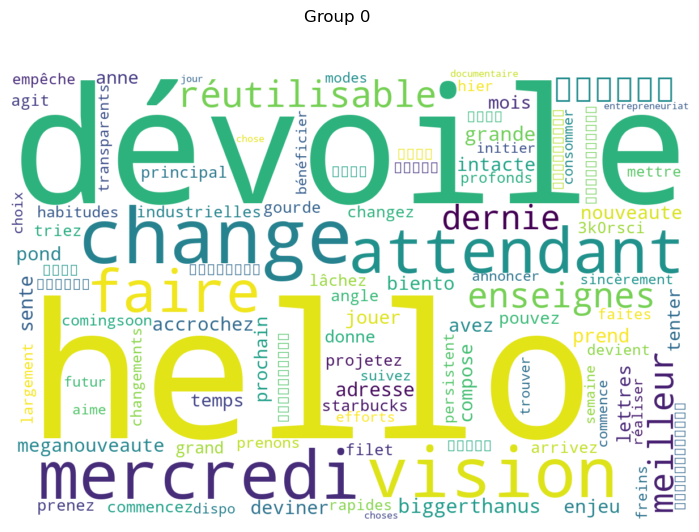

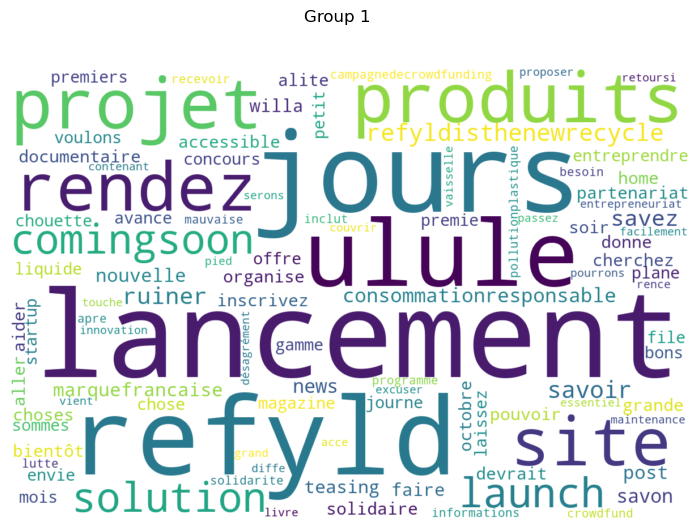

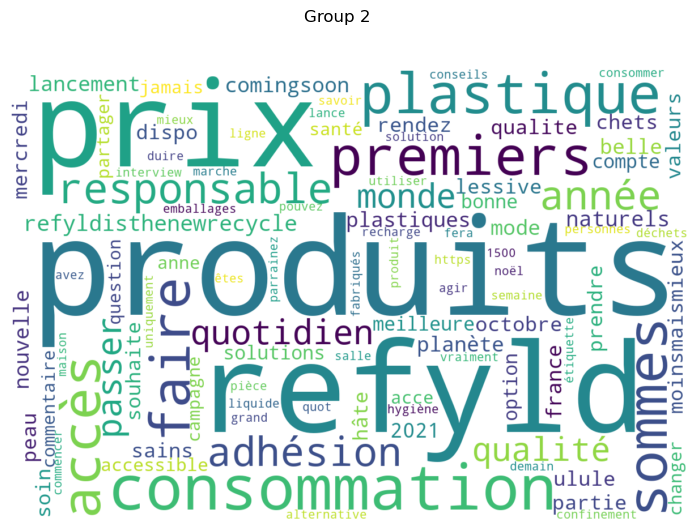

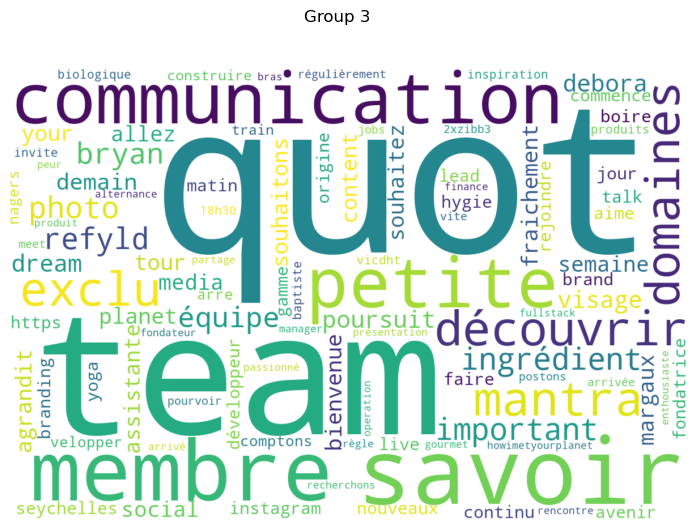

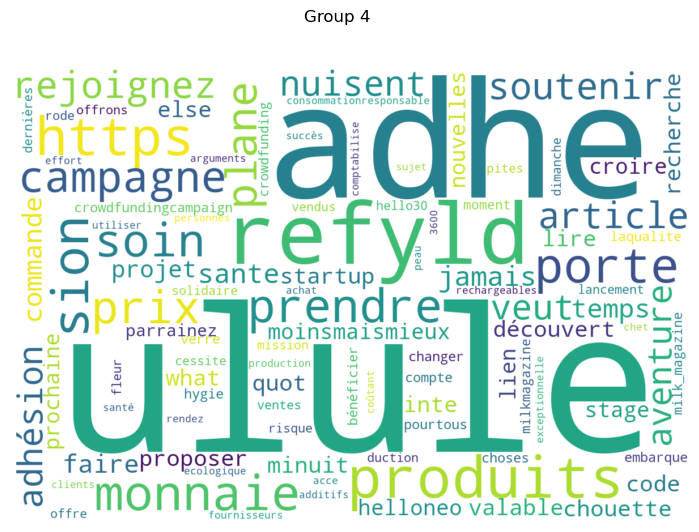

In [57]:
svd = TruncatedSVD(n_components=1748, random_state=42)
X_svd = svd.fit_transform(X)

cum_variance = np.cumsum(svd.explained_variance_ratio_)
idx = np.argmax(cum_variance > .8)
svd = TruncatedSVD(n_components=idx, random_state=42)
X_svd = svd.fit_transform(X)
_ = generate_wordclouds(X_svd, X, 5, word_positions)

In [58]:
mkm.labels_

array([4, 1, 4, 2, 0, 4, 1, 2, 1, 0, 3, 4, 2, 2, 2, 2, 1, 3, 3, 0, 0, 4,
       3, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 4, 4, 3, 1, 4, 4, 1, 0, 1, 3, 4,
       1, 4, 4, 4, 4, 2, 1, 4, 4, 1, 0, 4, 0, 0, 1, 1, 4, 1, 4, 1, 0, 0,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 0, 0, 3, 1, 3, 2, 1, 3, 1,
       0, 3, 3, 3, 3, 2, 3, 1, 1, 1, 0, 0])

In [59]:
mkm.cluster_centers_

array([[0.01124544, 0.00955213, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01583795, 0.        , 0.02956916, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00767924, 0.00767924,
        0.00767924]])

In [60]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\bruna\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\bruna\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


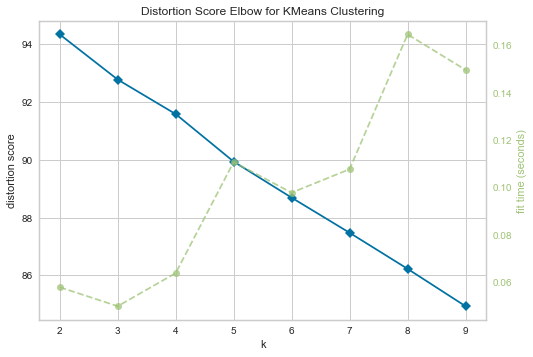

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.poof()

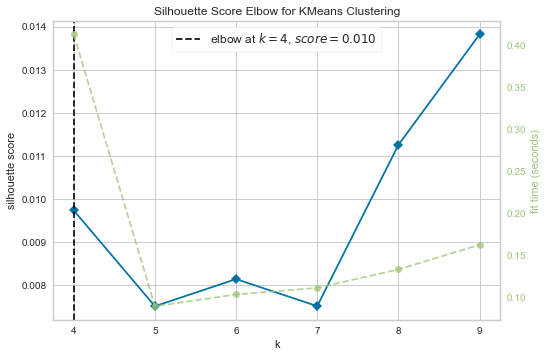

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [62]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(4,10), metric='silhouette')

visualizer.fit(X)
visualizer.poof()

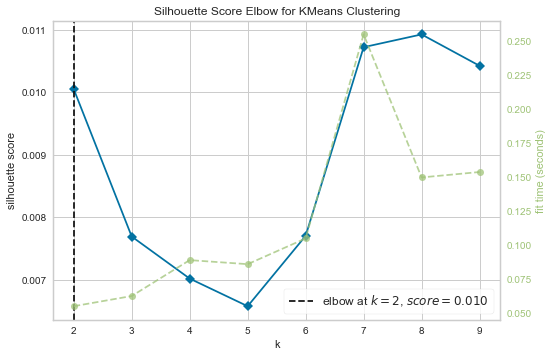

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [63]:
model=KMeans()
visualizer=KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.poof()

In [64]:
order_week = 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'

In [67]:
pd.crosstab(df_photo.week_day, df_photo.Cluster).reindex(order_week)

Cluster,0,1,2,3,4
week_day,,,,,
Sunday,0,5,0,3,2
Monday,4,10,2,6,3
Tuesday,3,4,2,3,2
Wednesday,2,2,1,5,4
Thursday,3,4,2,3,0
Friday,5,4,2,2,7
Saturday,0,4,0,0,1


In [68]:
df_photo.week_day.value_counts()

Monday       25
Friday       20
Wednesday    14
Tuesday      14
Thursday     12
Sunday       10
Saturday      5
Name: week_day, dtype: int64

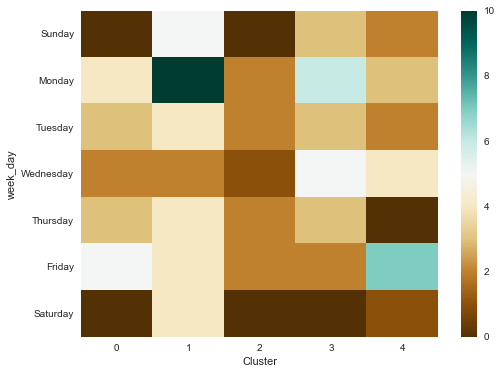

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df_photo.week_day, df_photo.Cluster).reindex(order_week), cmap='BrBG')
plt.show()

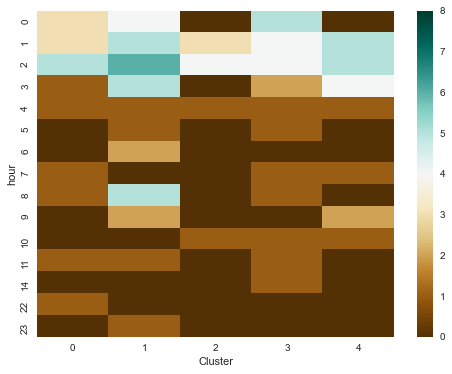

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df_photo.hour, df_photo.Cluster), cmap='BrBG', vmax = 8.0)
plt.show()

In [128]:
df_photo['Cluster'] = mkm.labels_

In [72]:
df_photo.Cluster.value_counts()

1    33
3    22
4    19
0    17
2     9
Name: Cluster, dtype: int64

In [73]:
df_photo.Cluster.value_counts(normalize=True)

1    0.33
3    0.22
4    0.19
0    0.17
2    0.09
Name: Cluster, dtype: float64

In [74]:
import datetime
import pytz
 

In [75]:
paris = pytz.timezone("Europe/Paris")
df_photo['Publié'] = pd.to_datetime(df_photo['Publié'], utc=True)
df_photo['Publié'] = df_photo['Publié'].dt.tz_convert(paris)

In [76]:
df_photo

,Message de publication,Type,Publié,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,...,Lifetime Matched Audience Targeting Consumptions by Type - other clicks,Lifetime Matched Audience Targeting Consumptions by Type - link clicks,Lifetime Negative Feedback from Users by Type - hide_clicks,Lifetime Negative Feedback by Type - hide_clicks,Cluster,hour,week_day,week,month,year
0,meilleure façon commencer année Prendre soin r...,Photo,2021-01-03 03:33:40+01:00,422.0,422.0,435.0,435.0,15.0,5.0,6.0,...,4.0,NaN,NaN,NaN,4,2,Sunday,53,January,2021
1,Pour libérer accès qualité chez Refyld relève ...,Photo,2021-01-03 03:54:02+01:00,306.0,306.0,313.0,313.0,3.0,2.0,3.0,...,3.0,NaN,NaN,NaN,1,2,Sunday,53,January,2021
2,solutions pour anne 2021 duire Recharger utili...,Photo,2021-01-05 04:56:38+01:00,322.0,322.0,350.0,350.0,13.0,2.0,2.0,...,2.0,NaN,NaN,NaN,4,3,Tuesday,1,January,2021
3,team Refyld agrandit Nous souhaitons bienvenue...,Photo,2021-01-08 02:08:45+01:00,537.0,537.0,570.0,570.0,64.0,46.0,68.0,...,42.0,23.0,NaN,NaN,2,1,Friday,1,January,2021
4,ultime pièce vous aimez prendre soin vous tout...,Photo,2021-01-12 02:20:55+01:00,192.0,192.0,201.0,201.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0,1,Tuesday,2,January,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,plupart déchets plastiques retrouvés provienne...,Photo,2020-12-14 03:20:08+01:00,336.0,336.0,350.0,350.0,6.0,1.0,1.0,...,1.0,NaN,NaN,NaN,1,2,Monday,51,December,2020
128,Avec produits naturels sains fabriqués France ...,Photo,2020-12-15 01:41:22+01:00,385.0,385.0,411.0,411.0,12.0,5.0,5.0,...,3.0,NaN,NaN,NaN,1,0,Tuesday,51,December,2020
129,Mais enfin qualite prix tant veut dire Notre p...,Photo,2020-12-18 03:07:08+01:00,338.0,338.0,349.0,349.0,6.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1,2,Friday,51,December,2020
130,ingrédient naturel veut dire quot origine natu...,Photo,2020-12-21 03:19:21+01:00,470.0,470.0,491.0,491.0,14.0,6.0,6.0,...,6.0,NaN,1.0,1.0,0,2,Monday,52,December,2020


In [77]:
df_photo['hour'] =  pd.to_datetime(df_photo['Publié'], yearfirst=True).dt.hour
    
df_photo['week_day'] = pd.to_datetime(df_photo['Publié'], yearfirst=True).dt.day_name()
    
df_photo['week']=pd.to_datetime(df_photo['Publié'], yearfirst=True).dt.isocalendar().week

df_photo['month']=pd.to_datetime(df_photo['Publié'], yearfirst=True).dt.month_name()

df_photo['year']=pd.to_datetime(df_photo['Publié'], yearfirst=True).dt.year
    

In [78]:
import datetime

df_photo['Publié'] = pd.to_datetime(df_photo['Publié'], yearfirst=True) + datetime.timedelta(hours=6)

In [79]:
df_photo

,Message de publication,Type,Publié,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,...,Lifetime Matched Audience Targeting Consumptions by Type - other clicks,Lifetime Matched Audience Targeting Consumptions by Type - link clicks,Lifetime Negative Feedback from Users by Type - hide_clicks,Lifetime Negative Feedback by Type - hide_clicks,Cluster,hour,week_day,week,month,year
0,meilleure façon commencer année Prendre soin r...,Photo,2021-01-03 09:33:40+01:00,422.0,422.0,435.0,435.0,15.0,5.0,6.0,...,4.0,NaN,NaN,NaN,4,3,Sunday,53,January,2021
1,Pour libérer accès qualité chez Refyld relève ...,Photo,2021-01-03 09:54:02+01:00,306.0,306.0,313.0,313.0,3.0,2.0,3.0,...,3.0,NaN,NaN,NaN,1,3,Sunday,53,January,2021
2,solutions pour anne 2021 duire Recharger utili...,Photo,2021-01-05 10:56:38+01:00,322.0,322.0,350.0,350.0,13.0,2.0,2.0,...,2.0,NaN,NaN,NaN,4,4,Tuesday,1,January,2021
3,team Refyld agrandit Nous souhaitons bienvenue...,Photo,2021-01-08 08:08:45+01:00,537.0,537.0,570.0,570.0,64.0,46.0,68.0,...,42.0,23.0,NaN,NaN,2,2,Friday,1,January,2021
4,ultime pièce vous aimez prendre soin vous tout...,Photo,2021-01-12 08:20:55+01:00,192.0,192.0,201.0,201.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0,2,Tuesday,2,January,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,plupart déchets plastiques retrouvés provienne...,Photo,2020-12-14 09:20:08+01:00,336.0,336.0,350.0,350.0,6.0,1.0,1.0,...,1.0,NaN,NaN,NaN,1,3,Monday,51,December,2020
128,Avec produits naturels sains fabriqués France ...,Photo,2020-12-15 07:41:22+01:00,385.0,385.0,411.0,411.0,12.0,5.0,5.0,...,3.0,NaN,NaN,NaN,1,1,Tuesday,51,December,2020
129,Mais enfin qualite prix tant veut dire Notre p...,Photo,2020-12-18 09:07:08+01:00,338.0,338.0,349.0,349.0,6.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1,3,Friday,51,December,2020
130,ingrédient naturel veut dire quot origine natu...,Photo,2020-12-21 09:19:21+01:00,470.0,470.0,491.0,491.0,14.0,6.0,6.0,...,6.0,NaN,1.0,1.0,0,3,Monday,52,December,2020


In [80]:
df_photo.reset_index(inplace=True)

In [81]:
df_photo[['Lifetime Post Total Reach', 'Lifetime Post Total Impressions','Lifetime Engaged Users']] = df_photo[['Lifetime Post Total Reach', 'Lifetime Post Total Impressions','Lifetime Engaged Users']].astype(int)

In [130]:
df_cluster = df_photo.groupby(['Cluster'])[['Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Matched Audience Targeting Consumers on Post',
       'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post']].sum()

In [131]:
df_cluster

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post
Cluster,,,,,,,,
0,13744,15133,743,467.0,602.0,9105.0,8278.0,546.0
1,7079,7714,278,162.0,197.0,5303.0,4850.0,214.0
2,7864,8395,388,204.0,249.0,6033.0,5642.0,336.0
3,21201,26947,684,473.0,556.0,5650.0,4924.0,390.0
4,9393,9977,501,308.0,411.0,6840.0,6449.0,406.0


In [132]:
df_cluster['Difference Reach'] = df_cluster['Lifetime Post Total Reach'] - df_cluster['Lifetime Post reach by people who like your Page']

In [133]:
df_cluster['Difference Impressions'] = df_cluster['Lifetime Post Total Impressions'] - df_cluster['Lifetime Post Impressions by people who have liked your Page']

In [134]:
df_cluster['Difference Clicks'] = df_cluster['Lifetime Engaged Users'] - df_cluster['Lifetime Matched Audience Targeting Consumers on Post']

In [137]:
df_cluster.loc[df_cluster.Cluster == 0, 'Cluster'] = 'Ulule Campagne'
df_cluster.loc[df_cluster.Cluster == 1, 'Cluster'] = 'Produits'
df_cluster.loc[df_cluster.Cluster == 2, 'Cluster'] = 'Brand Disclose'
df_cluster.loc[df_cluster.Cluster == 3, 'Cluster'] = 'Brand Launch'
df_cluster.loc[df_cluster.Cluster == 4, 'Cluster'] = 'Enrolement'


In [138]:
df_cluster

,Cluster,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Difference Reach,Difference Impressions,Difference Clicks
0,Ulule Campagne,13744,15133,743,467.0,602.0,9105.0,8278.0,546.0,5466.0,6028.0,276.0
1,Produits,7079,7714,278,162.0,197.0,5303.0,4850.0,214.0,2229.0,2411.0,116.0
2,Brand Disclose,7864,8395,388,204.0,249.0,6033.0,5642.0,336.0,2222.0,2362.0,184.0
3,Brand Launch,21201,26947,684,473.0,556.0,5650.0,4924.0,390.0,16277.0,21297.0,211.0
4,Enrolement,9393,9977,501,308.0,411.0,6840.0,6449.0,406.0,2944.0,3137.0,193.0


In [113]:
df_foo = df_cluster.groupby('Cluster')['Lifetime Post reach by people who like your Page', 'Difference Reach'].sum()

<ipython-input-113-f717a8cd18d6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_foo = df_cluster.groupby('Cluster')['Lifetime Post reach by people who like your Page', 'Difference Reach'].sum()


In [114]:
df_foo

,Lifetime Post reach by people who like your Page,Difference Reach
Cluster,,
Brand Disclose,4911.0,2694.0
Brand Launch,9373.0,4203.0
Enrolment,6969.0,4306.0
Products,3289.0,1441.0
Ulule Campagne,5601.0,16494.0


In [115]:
from matplotlib.colors import ListedColormap


In [152]:
description

{'Lifetime Post Total Reach': "Lifetime: The number of people who had your Page's post enter their screen. Posts include statuses, photos, links, videos and more. (Unique Users)",
 'Lifetime Post organic reach': "Lifetime: The number of people who had your Page's post enter their screen through unpaid distribution. (Unique Users)",
 'Lifetime Post Paid Reach': "Lifetime: The number of people who had your Page's post enter their screen through paid distribution such as an ad. (Unique Users)",
 'Lifetime Post Total Impressions': "Lifetime: The number of times your Page's post entered a person's screen. Posts include statuses, photos, links, videos and more. (Total Count)",
 'Lifetime Post Organic Impressions': "Lifetime: The number of times your Page's posts entered a person's screen through unpaid distribution. (Total Count)",
 'Lifetime Post Paid Impressions': "Lifetime: The number of times your Page's post entered a person's screen through paid distribution such as an ad. (Total Count

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

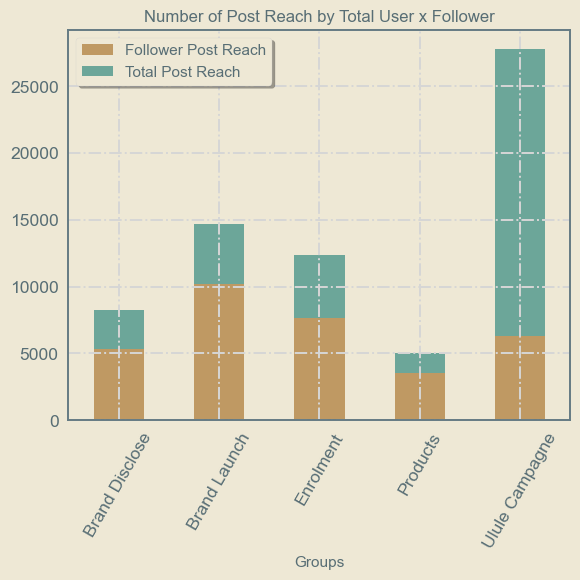

In [139]:
jtplot.style(theme='solarizedl', figsize=(6,6), gridlines='-.', context = 'notebook')

my_cmap = ListedColormap(sns.color_palette('BrBG'))


df_foo.plot(kind = 'bar', stacked = True, colormap = my_cmap, alpha = 0.6)
plt.legend(labels=['Follower Post Reach', 'Total Post Reach'], fontsize=11.0, shadow = True)
plt.title('Number of Post Reach by Total User x Follower', fontsize = 12.0) 
plt.xticks(rotation = 60)
plt.xlabel('Groups', fontsize=11.0)
plt.savefig('Number of Post Reach by Total User x Follower.jpg', dpi = 200)
plt.tight_layout()
plt.show()

In [140]:
df_cluster.columns

Index(['Cluster', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Matched Audience Targeting Consumers on Post',
       'Lifetime Matched Audience Targeting Consumptions on Post',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Difference Reach', 'Difference Impressions', 'Difference Clicks'],
      dtype='object')

In [141]:
df_foo = df_cluster.groupby('Cluster')['Lifetime Post Impressions by people who have liked your Page', 'Difference Impressions'].sum()

<ipython-input-141-d70e275594c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_foo = df_cluster.groupby('Cluster')['Lifetime Post Impressions by people who have liked your Page', 'Difference Impressions'].sum()


In [142]:
df_cluster.reset_index(inplace=True)

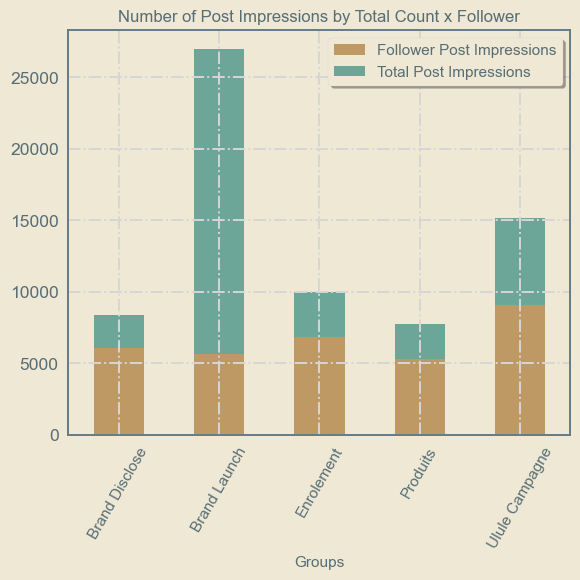

In [143]:
jtplot.style(theme='solarizedl', figsize=(6,6), gridlines='-.', context = 'notebook')

my_cmap = ListedColormap(sns.color_palette('BrBG'))


df_foo.plot(kind = 'bar', stacked = True, colormap = my_cmap, alpha = 0.6)
plt.legend(labels=['Follower Post Impressions', 'Total Post Impressions'], fontsize=11.0, shadow= True)
plt.title('Number of Post Impressions by Total Count x Follower', fontsize=12.0) 
plt.xticks(rotation = 60, fontsize=11.0)
plt.xlabel('Groups', fontsize=11.0)
plt.savefig('Number of Post Impressions by Total Count x Follower.jpg', dpi = 200)
plt.tight_layout()
plt.show()


In [144]:
df_cluster

,index,Cluster,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Difference Reach,Difference Impressions,Difference Clicks
0,0,Ulule Campagne,13744,15133,743,467.0,602.0,9105.0,8278.0,546.0,5466.0,6028.0,276.0
1,1,Produits,7079,7714,278,162.0,197.0,5303.0,4850.0,214.0,2229.0,2411.0,116.0
2,2,Brand Disclose,7864,8395,388,204.0,249.0,6033.0,5642.0,336.0,2222.0,2362.0,184.0
3,3,Brand Launch,21201,26947,684,473.0,556.0,5650.0,4924.0,390.0,16277.0,21297.0,211.0
4,4,Enrolement,9393,9977,501,308.0,411.0,6840.0,6449.0,406.0,2944.0,3137.0,193.0


In [145]:
df_fooo = df_cluster.groupby('Cluster')['Lifetime Matched Audience Targeting Consumers on Post', 'Difference Clicks'].sum()

<ipython-input-145-52fd80b37950>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_fooo = df_cluster.groupby('Cluster')['Lifetime Matched Audience Targeting Consumers on Post', 'Difference Clicks'].sum()


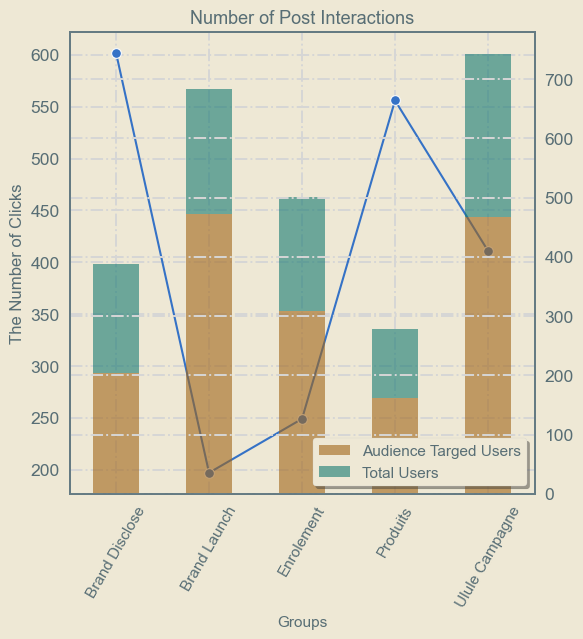

In [151]:
matplotlib.rc_file_defaults()
jtplot.style(theme='solarizedl', figsize=(6,6), gridlines='-.',context = 'notebook')

ax1 = sns.set_style()

fig, ax1 = plt.subplots()

sns.lineplot(data = df_cluster['Lifetime Matched Audience Targeting Consumptions on Post'], marker='o', sort = False, ax=ax1)
plt.xlabel('Groups', fontsize=11.0)
plt.ylabel('The Number of Clicks', fontsize=12.0)
plt.xticks(rotation = 60, fontsize=11.0)

ax2 = ax1.twinx()
plt.title('Number of Post Interactions', fontsize = 13.0)
df_fooo.plot(kind = 'bar', stacked = True, colormap = my_cmap, alpha = 0.6, ax=ax2)
plt.legend(labels=['Audience Targed Users', 'Total Users'], loc=4, fontsize= 11.0, shadow = True)
plt.ylabel('', fontsize=11.0)
plt.ylabel('The Number of Users', fontsize=12.0, rotation = -90)
plt.savefig('Number of Post Interactions_2.0.jpg', bbox_inches='tight', dpi = 200)
plt.show()

In [ ]:
description

In [ ]:
jtplot.style(theme='solarizedl', figsize=(10,10))
sns.barplot(data = df_cluster, x = 'Cluster', y='Lifetime Post reach by people who like your Page')

In [ ]:
sns.heatmap(data = df_cluster.T, vmax=10000.0, cmap='BrBG')